In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

C:\Users\surajshukla\AppData\Local\Temp\ipykernel_7032\3175661469.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("medical_insurance_preprocessed.csv")

features = df.columns
print(features)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


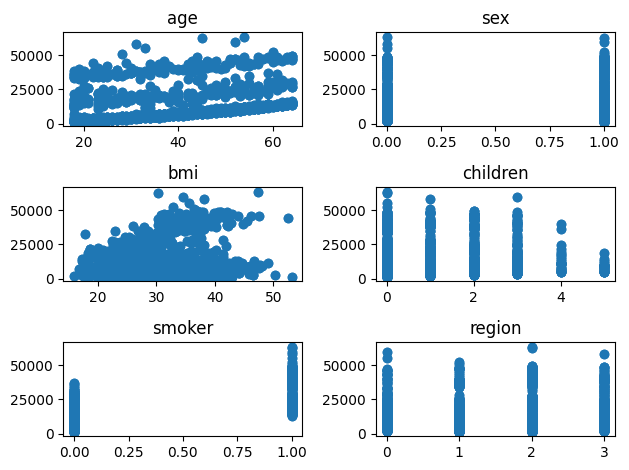

In [3]:
for i in range(6):
    plt.subplot(3, 2, i + 1)
    plt.scatter(df[features[i]], df[features[6]])
    plt.title(features[i])

plt.tight_layout()
plt.show()

In [4]:
# def Mean(df, feature):
#     return np.mean(df[feature])

# def StandardDeviation(df, feature, Mean):
#     return (np.mean((df[feature] - Mean)**2)) ** 0.5

# def StandardScaler(df, features):
#     m = df.shape[0]
#     mu = list()
#     sigma = list()
    
#     for feature in features:
#         mu_i = Mean(df, feature)
#         sigma_i = StandardDeviation(df, feature, mu_i)
        
#         df[feature] = (df[feature] - mu_i) / sigma_i
        
#         mu.append(mu_i)
#         sigma.append(sigma_i)
        
#     return mu, sigma
    
# def StandardScalerInference(df, features, mu, sigma):
    
#     for i, feature in enumerate(features):
#         df[feature] = (df[feature] - mu[i]) / sigma

In [5]:
def compute_cost(X, y, W, b):
    m = X.shape[0]

    f_wb = np.dot(W, X.T) + b
    cost = (1/(2*m))*np.sum((f_wb - y) ** 2)
    return cost


In [6]:
def compute_gradient(X, y, W, b):
    m = X.shape[0]
    
    f_wb = np.dot(W, X.T) + b

    dj_dw = (1/m)*np.sum((f_wb - y)*X.T)
    dj_db = (1/m)*np.sum(f_wb - y)
    
    return dj_dw, dj_db

In [7]:
def gradient_descent(X, y, W_in, b_in, alpha, no_of_iterations): 
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    W = W_in  #avoid modifying global w within function
    b = b_in

    for i in range(no_of_iterations):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = compute_gradient(X, y, W, b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        W = W - alpha * dj_dw  

        J_history.append(compute_cost(X, y, W, b))

    return W, b, J_history 

In [8]:
df.head()

# df.columns

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,0,21984.47061
4,32,1,28.880,0,0,0,3866.85520


In [9]:
y = np.array(df['charges'])
X = np.array(df.drop(columns=['charges'], axis=1))
# X = np.array(df['age']).reshape(-1, 1)

print(X[:5])
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the training set into training and cross-validation sets
X_test, X_cv, y_test, y_cv = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
print("Cross-validation set shape:", X_cv.shape, y_cv.shape)

print(X_train[:5])

[[19.     0.    27.9    0.     1.     1.   ]
 [18.     1.    33.77   1.     0.     2.   ]
 [28.     1.    33.     3.     0.     2.   ]
 [33.     1.    22.705  0.     0.     0.   ]
 [32.     1.    28.88   0.     0.     0.   ]]
Training set shape: (1663, 6) (1663,)
Testing set shape: (554, 6) (554,)
Cross-validation set shape: (555, 6) (555,)
[[57.    1.   31.54  0.    0.    0.  ]
 [46.    0.   32.3   2.    0.    3.  ]
 [32.    0.   23.65  1.    0.    2.  ]
 [42.    1.   26.07  1.    1.    2.  ]
 [23.    0.   31.4   0.    1.    1.  ]]


In [10]:
def Mean(arr, feature):
    return np.mean(arr[: , feature])

def StandardDeviation(arr, feature, Mean):
    return (np.mean((arr[:, feature] - Mean)**2)) ** 0.5

def StandardScaler(arr, features):
    m = df.shape[0]
    mu = list()
    sigma = list()
    
    for feature in features:
        # print(feature)
        # print(arr[:, feature].shape)
        mu_i = Mean(arr, feature)
        sigma_i = StandardDeviation(arr, feature, mu_i)
        
        arr[:, feature] = (arr[: , feature] - mu_i) / sigma_i
        
        mu.append(mu_i)
        sigma.append(sigma_i)
        
    return mu, sigma
    
def StandardScalerInference(arr, features, mu, sigma):
    
    for i, feature in enumerate(features):
        arr[:, feature] = (arr[:, feature] - mu[i]) / sigma[i]

In [11]:
# features = np.array(['age', 'bmi', 'children', 'region'])
features = np.array([0, 2, 3, 5])
# features = np.array([0])

mu, sigma = StandardScaler(X_train, features)
# print(mu)

print(X_train[:25])

[[ 1.26657288e+00  1.00000000e+00  1.56258834e-01 -9.19951859e-01
   0.00000000e+00 -1.35642994e+00]
 [ 4.75348699e-01  0.00000000e+00  2.80861300e-01  7.21550224e-01
   0.00000000e+00  1.35371382e+00]
 [-5.31663895e-01  0.00000000e+00 -1.13731150e+00 -9.92008174e-02
   0.00000000e+00  4.50332567e-01]
 [ 1.87630815e-01  1.00000000e+00 -7.40551015e-01 -9.92008174e-02
   1.00000000e+00  4.50332567e-01]
 [-1.17902913e+00  0.00000000e+00  1.33305749e-01 -9.19951859e-01
   1.00000000e+00 -4.53048686e-01]
 [-7.47452309e-01  1.00000000e+00  6.25157585e-01 -9.19951859e-01
   1.00000000e+00 -4.53048686e-01]
 [-1.32288808e+00  0.00000000e+00 -1.43242260e+00 -9.92008174e-02
   1.00000000e+00  1.35371382e+00]
 [-2.81575981e-02  1.00000000e+00  2.87419324e-01  7.21550224e-01
   0.00000000e+00  4.50332567e-01]
 [-5.31663895e-01  1.00000000e+00  1.08094029e+00  7.21550224e-01
   0.00000000e+00  4.50332567e-01]
 [-1.53867649e+00  0.00000000e+00 -4.62201719e-02 -9.19951859e-01
   0.00000000e+00  1.3537

In [12]:
noOffeatures = X_train.shape[1]
W_init = np.zeros(noOffeatures)
b_init = 0
no_of_iterations = 100000
alpha = 0.001


W_final, b_final, J_hist = gradient_descent(X_train ,y_train, W_init, b_init, alpha, no_of_iterations)



# cost_before = compute_cost(X_test, y_test, W_init, b_init)
# cost_after = compute_cost(X_test, y_test, w_final, b_final)

# print(cost_before, cost_after)

[2374.52437875 2374.52437875 2374.52437875 2374.52437875 2374.52437875
 2374.52437875]
11557.555755767422
[159920329.44582438, 159292781.88951662, 158671310.31318048, 158055848.9216483, 157446332.64628574, 156842697.13694406, 156244878.75400096, 155652814.56049022, 155066442.31431824, 154485700.4605671, 153910528.12388244, 153340865.10094646, 152776651.85303348, 152217829.4986488, 151664339.80624843, 151116125.18704018, 150573128.68786392, 150035293.98415127, 149502565.37296286, 148974887.76610312, 148452206.68331116, 147934468.24552715, 147421619.1682335, 146913606.7548695, 146410378.89031926, 145911884.03447163, 145418071.21585166, 144928890.02532244, 144444290.60985687, 143964223.66637844, 143488640.4356702, 143017492.69635138, 142550732.75892055, 142088313.4598651, 141630188.15583563, 141176310.7178852, 140726635.5257723, 140281117.46232688, 139839711.90787917, 139402374.73474967, 138969062.30180067, 138539731.44904804, 138114339.49233264, 137692844.21805078, 137275203.87794325, 13

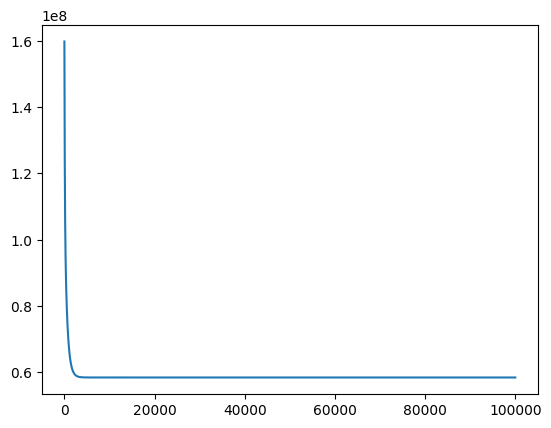

In [13]:
print(W_final)
print(b_final)
print(J_hist)

plt.plot(J_hist)
plt.show()

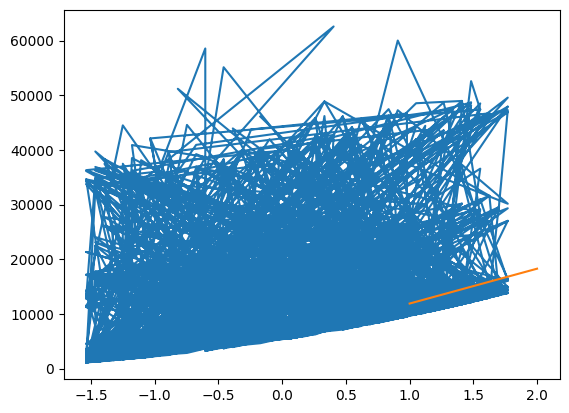

In [16]:
plt.plot(X_train[:, 0], y_train)
plt.plot([1, 2], [(np.sum(np.dot(W_final, X_train[0])) + b_final), (np.sum(np.dot(W_final, X_train[1])) + b_final)])

plt.show()

In [15]:
cost_before = compute_cost(X_test, y_test, W_init, b_init)
cost_after = compute_cost(X_test, y_test, W_final, b_final)

StandardScalerInference(X_cv, features, mu, sigma)
StandardScalerInference(X_test, features, mu, sigma)

cost_cv = compute_cost(X_cv, y_cv, W_final, b_final)
cost_test = compute_cost(X_test, y_test, W_final, b_final)
cost_train = compute_cost(X_train, y_train, W_final, b_final)

print(cost_cv, cost_test, cost_train)

63314563.2519915 59614537.14193623 58266134.273859136


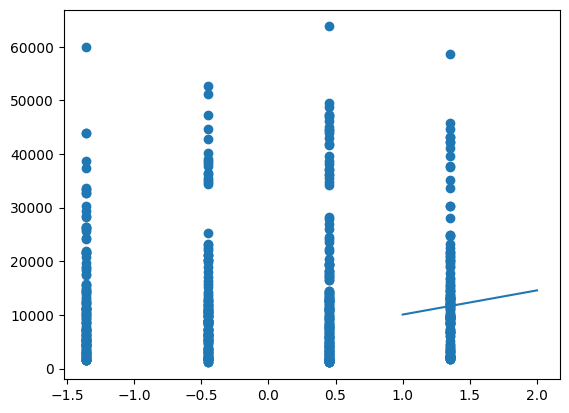

In [22]:
plt.scatter(X_test[:, 5], y_test)
plt.plot([1, 2], [(np.sum(np.dot(W_final, X_test[0])) + b_final), (np.sum(np.dot(W_final, X_test[1])) + b_final)])

plt.show()